<h1><center> Data Visualization by Data Queen </center></h1>

The aim of this project is to explore the factors influencing our primary variable, Pulse Per Minute, which serves as a key indicator of heart health. This dataset provides a comprehensive look at how various demographic, lifestyle, and health-related factors might impact an individual's pulse rate. By examining these relationships, we can uncover patterns, correlations, and potential risk factors that could provide insights into heart health management and prevention strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t


In [2]:
#Theme Colors
primary_color = '#5ec3e1'  # Light blue from the logo
secondary_color = '#1f78b4'  # Dark blue from the logo
highlight_color = '#e74c3c'  # Red in the logo
background_color = '#001C30'  # Background color

brand_colors = ['#00BFFF', '#1E90FF', '#00CED1', '#4682B4', '#5F9EA0']

# Loading Dataset

In [3]:
pulse = pd.read_excel(r'Pulse.xlsx')
pulse.rename(columns={'Pulse Per Minute':'Pulse',
                         'Place of Living':'Location',
                     'Sports activity':'Sports'},
                        inplace = True)

In [4]:
pulse

,Patient,Gender,Age,Sports,Smoker,Illness,Pulse,Beat Regularity,Respiratory Rate,Lower Tension,Upper Tension,Temperature,Location
0,1,Male,13-45,Yes,Yes,Cardiac,100,Regular,18,9.5,17.5,37.0,North
1,2,Male,13-45,Yes,Yes,Cardiac,45,Irregular,16,3.5,6.5,36.2,North
2,3,Female,> 45,No,Yes,Cardiac,85,Regular,20,9.5,14.5,36.5,North
3,4,Female,> 45,No,No,Cardiac,75,Irregular,16,6.5,12.5,37.8,North
4,5,Female,> 45,No,Yes,Cardiac,89,Regular,22,8.5,16.5,38.0,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,643,Male,13-45,Yes,Yes,Diabetes,70,Regular,25,6.5,10.5,37.0,Mount Lebanon
643,644,Male,> 45,No,Yes,Cancer (E.S),89,Irregular,21,7.5,11.5,37.0,North
644,645,Female,13-45,No,No,Cancer (E.S),69,Regular,27,6.5,11.5,37.0,Beirut
645,646,Male,13-45,No,Yes,Cardiac,75,Irregular,15,8.5,12.5,36.8,Beirut


# Exploring Variables

The dataset consists of 647 entries and 14 columns, each representing a variable of numerical and categorical data types, which provide various perspectives for analyzing pulse rates.

1- Numerical Columns: These include Pulse, Respiratory Rate, Lower Tension, Upper Tension, and Temperature.

2- Categorical Columns: These are Age range, Gender, Sports, Smoker, Illness, Beat Regularity, Location.

In [5]:
pulse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient           647 non-null    int64  
 1   Gender            647 non-null    object 
 2   Age               647 non-null    object 
 3   Sports            647 non-null    object 
 4   Smoker            647 non-null    object 
 5   Illness           647 non-null    object 
 6   Pulse             647 non-null    int64  
 7   Beat Regularity   647 non-null    object 
 8   Respiratory Rate  647 non-null    int64  
 9   Lower Tension     647 non-null    float64
 10  Upper Tension     647 non-null    float64
 11  Temperature       647 non-null    float64
 12  Location          647 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 65.8+ KB


# Descriptive Statistics for The Primary Variable Pulse (min)  

The pulse rates range from a minimum of 42 beats/min to a maximum of 160 beats/min, with a mean pulse rate of approximately 83.33 beats/min. The data is moderately skewed to the right, with a skewness value of 1.23, indicating that there are some higher pulse rates pulling the average up. The standard deviation is 17.85, reflecting the variability in pulse rates among the patients.

The distribution's central tendency is marked by a median (Q2) of 80 beats/min which is close to the mode, which is also 80 beats per minute. The data has a first quartile (Q1) at 72 beats per minute and a third quartile (Q3) at 90 beats/min, a range in which 50% of the data lies.

Additionally, the confidence interval for the mean pulse rate, ranging from approximately 81.97 to 84.90 beats per minute, offers a 95% certainty that the true mean pulse rate of the population falls within this interval.


In [6]:
def descriptive_statistics(df, column_name):
    column_data = df[column_name].dropna()

    # Calculate statistics
    min_val=column_data.min()
    max_val=column_data.max()
    mean_val = column_data.mean()
    mode_val = column_data.mode()[0] if not column_data.mode().empty else np.nan
    variance_val = round(column_data.var(), 3)
    std_dev_val = round(column_data.std(), 3)
    min_val = column_data.min()
    q1_val = column_data.quantile(0.25)
    q2_val = column_data.quantile(0.5)
    q3_val = column_data.quantile(0.75)
    max_val = column_data.max()
    range_val = max_val - min_val
    sum_val = column_data.sum()
    cv_val = round(std_dev_val / mean_val, 3)
    se_val = round(stats.sem(column_data), 3)
    skew_val = round(column_data.skew(), 3)
    kurt_val = round(column_data.kurtosis(), 3)
    conf_interval_val = t.interval(0.95, len(column_data) - 1, loc=mean_val, scale=se_val)
    conf_interval_val_round = (round(conf_interval_val[0], 3), round(conf_interval_val[1], 3))

  
    stats_dict = {
        'Statistic': [
            'Count','Min','Max', 'Mean', 'Mode', 'Variance', 'Standard deviation', 
            'Minimum', 'First quartile (Q1)', 'Median (Q2)', 'Third quartile (Q3)', 
            'Maximum', 'Range', 'Sum', 'Coefficient of variation', 
            'Standard error', 'Skewness', 'Kurtosis', 'Confidence interval'
        ],
        'Value': [
            column_data.count(),min_val,max_val, mean_val, mode_val, variance_val, std_dev_val,
            min_val, q1_val, q2_val, q3_val, max_val, range_val, sum_val,
            cv_val, se_val, skew_val, kurt_val, f"{conf_interval_val_round[0]} to {conf_interval_val_round[1]}"
        ]
    }


    stats_df = pd.DataFrame(stats_dict)

    # Styling the table
    styles = [
        {
            'selector': 'th',
            'props': [
                ('background-color', primary_color),
                ('color', 'white'),
                ('border-bottom', '1px solid white')
            ]
        },
        {
            'selector': 'td',
            'props': [
                ('color', secondary_color),
                ('border-bottom', '1px solid white')
            ]
        },
        {
            'selector': 'tbody tr:nth-child(odd) td',
            'props': [
                ('background-color', background_color)
            ]
        },
        {
            'selector': 'tbody tr:nth-child(even) td',
            'props': [
                ('background-color', '#112b40')
            ]
        }
    ]
    

    stats_df.columns = ['Statistic', f'Descriptive Statistics for {column_name}']
    

    styled_table = stats_df.style.set_table_styles(styles)
    
    return styled_table



In [7]:
descriptive_statistics(pulse,'Pulse')

,Statistic,Descriptive Statistics for Pulse
0,Count,647
1,Min,42
2,Max,160
3,Mean,83.332303
4,Mode,80
5,Variance,311.470000
6,Standard deviation,17.649000
7,Minimum,42
8,First quartile (Q1),72.000000
9,Median (Q2),80.000000


# Distribution and Cumulative Frequency of Pulse Per Minute

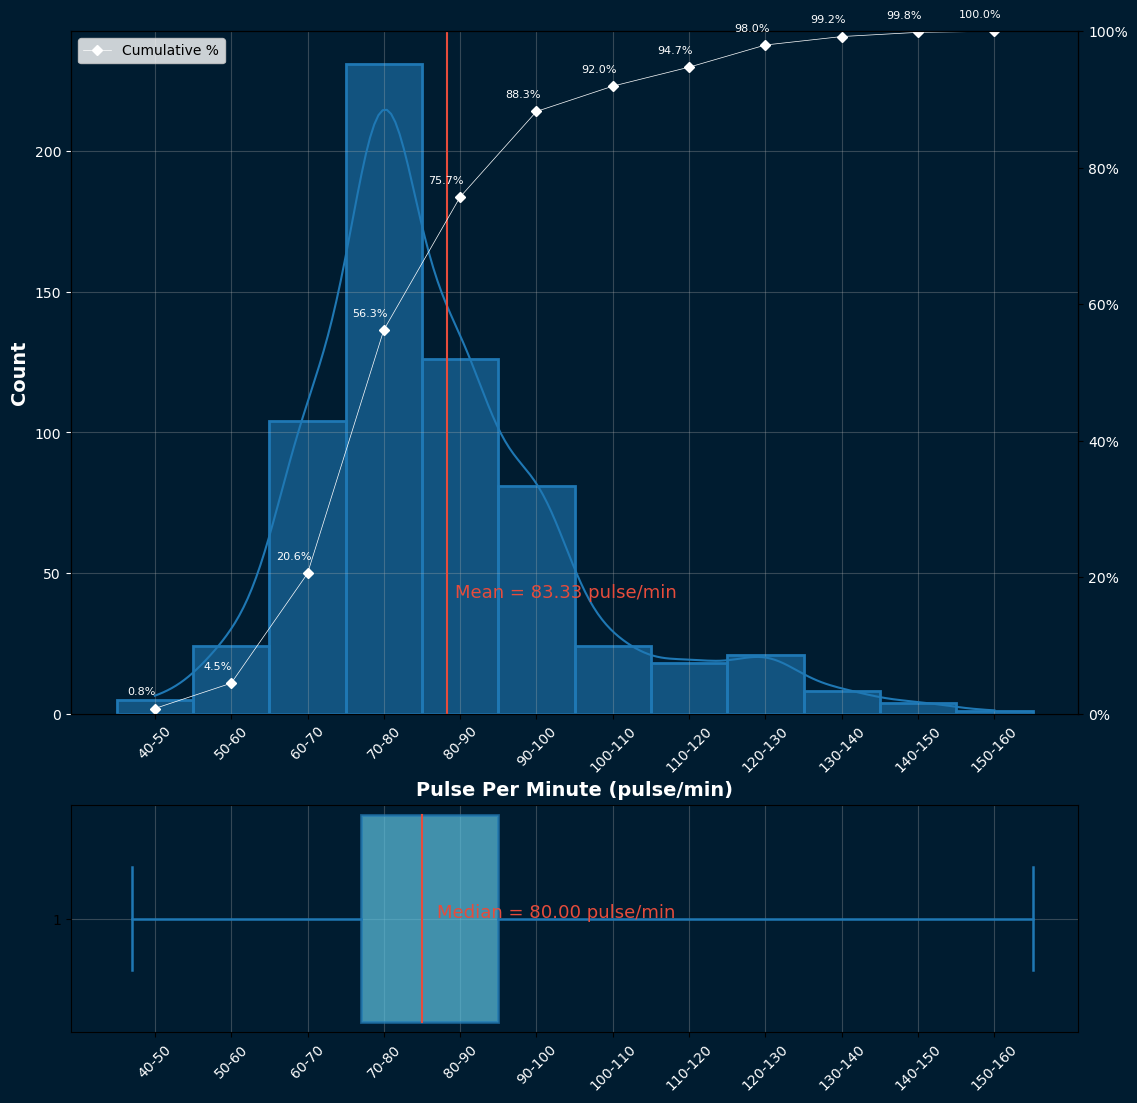

In [8]:
def histogram_with_boxplot(df, column_name='Pulse'):
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 13), gridspec_kw={'height_ratios': [3, 1]})
    bins = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

    df['Pulse Rate midpoints'] = pd.cut(df[column_name], bins=bins, labels=midpoints)
    
    sns.histplot(df['Pulse Rate midpoints'].dropna().astype(float),
                 stat='count', bins=bins, kde=True,
                 color=secondary_color, ax=ax1,
                 edgecolor=secondary_color, linewidth=2, alpha=0.6)

    ax1.set_xlabel("Pulse Per Minute (pulse/min)", fontsize=14, fontweight="bold", color='white')
    ax1.set_ylabel("Count", fontsize=14, fontweight="bold", color='white')

    ax1.set_xticks(midpoints)
    ax1.set_xticklabels(labels, rotation=45, color='white')
    ax1.tick_params(axis='y', colors='white')  # Set y-axis label color to white
    ax1.grid(True, alpha=0.3)
    ax1.axvline(x=df[column_name].mean(), c=highlight_color)
    ax1.text(df[column_name].mean() + 1, max(df[column_name].value_counts()) * 0.9,
             f'Mean = {df[column_name].mean():.2f} pulse/min', color=highlight_color, fontsize=13)

    ax1b = ax1.twinx()
    counts, bin_edges = np.histogram(df['Pulse Rate midpoints'].dropna().astype(float), bins=bins)
    cumulative_counts = np.cumsum(counts)
    cumulative_percentages = cumulative_counts / sum(counts) * 100

    ax1b.plot(midpoints, cumulative_percentages, color='white', linewidth=0.5, marker='D', ms=5, label='Cumulative %')
    ax1b.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(int(x))))
    ax1b.set_ylim([0, 100])
    ax1b.legend(loc='upper left')
    ax1b.tick_params(axis='y', labelcolor='white')  # Set y-axis label color to white

    for i, pct in enumerate(cumulative_percentages):
        ax1b.annotate(f'{pct:.1f}%', (midpoints[i], pct), textcoords="offset points", xytext=(-10, 10),
                      ha='center', color='white', fontsize=8)

    box_plot = ax2.boxplot(df[column_name], vert=False, widths=30, whis=118, patch_artist=True)
    style_boxplot(box_plot, ax2, primary_color, secondary_color, highlight_color)

   
  
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(midpoints)
    ax2.set_xticklabels(labels, rotation=45, color='white')
    ax2.grid(True, alpha=0.3)

    ax2.text(df[column_name].median() + 2, 1.1, f'Median = {df[column_name].median():.2f} pulse/min',
             color=highlight_color, fontsize=13)

    fig.patch.set_facecolor(background_color)
    ax1.set_facecolor(background_color)
    ax2.set_facecolor(background_color)

    plt.show()

def style_boxplot(box_plot, ax, primary_color, secondary_color, highlight_color):
    for box in box_plot['boxes']:
        box.set_facecolor(primary_color)
        box.set_edgecolor(secondary_color)
        box.set_linewidth(2)
        box.set_alpha(0.7)
    for whisker in box_plot['whiskers']:
        whisker.set_linewidth(1.8)
        whisker.set_color(secondary_color)
    for cap in box_plot['caps']:
        cap.set_linewidth(1.8)
        cap.set_color(secondary_color)
    for median in box_plot['medians']:
        median.set_color(highlight_color)
        median.set_linewidth(1.5)


histogram_with_boxplot(pulse)


# Heat Maps: Illness by Gender, Illness by Smoker

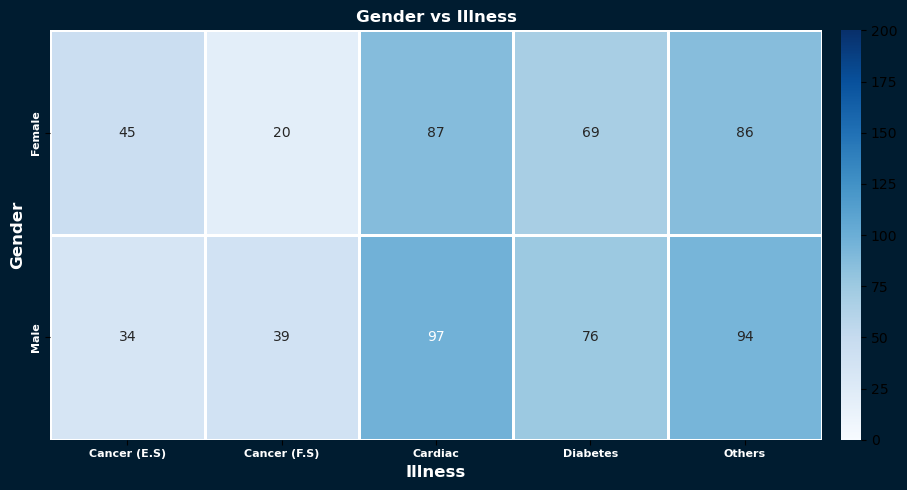

In [9]:
def plot_heatmap(matrix, var1, var2, cmap="Blues",  annot=True):
    
    title_template='{} vs {}'
    font_color='white'
    plt.figure(figsize=(10, 5))
    var1_by_var2 = pd.crosstab(matrix[var1], matrix[var2])
    
    # Create heatmap
    sns.heatmap(var1_by_var2, vmin=0, vmax=200, center=100,
                cmap=cmap, annot=annot, fmt='.4g', linewidths=1, linecolor='white',
                cbar=True, square=False, xticklabels=True, yticklabels=True,
                cbar_kws={'orientation': 'vertical', 'aspect': 20, 'pad': 0.02})

    # Title with enhanced font properties
    plt.title(title_template.format(var1, var2), fontsize=12, fontweight='bold', color=font_color)
    
    # Set label colors and font sizes
    plt.xlabel(var2, fontsize=12, fontweight='bold', color=font_color)
    plt.ylabel(var1, fontsize=12, fontweight='bold', color=font_color)
    
    # Customize tick labels color
    plt.xticks(color=font_color, fontsize=8, rotation=0, ha='center', fontweight='bold')
    plt.yticks(color=font_color, fontsize=8, fontweight='bold')
    
    # Set background color
    plt.gca().set_facecolor(background_color)
    plt.gcf().set_facecolor(background_color)
    
    # Adjust layout for better spacing
    plt.tight_layout()

    plt.show()
    
    


plot_heatmap(pulse, var1='Gender', var2='Illness')


The heatmap highlights that certain illnesses, such as cardiac issues and diabetes, have a balanced distribution across genders, while others, like Cancer (E.S.) and Cancer (F.S.), show more noticeable gender differences. This visualization helps in quickly identifying which illnesses are more common in each gender and could guide further analysis into gender-specific health risks.

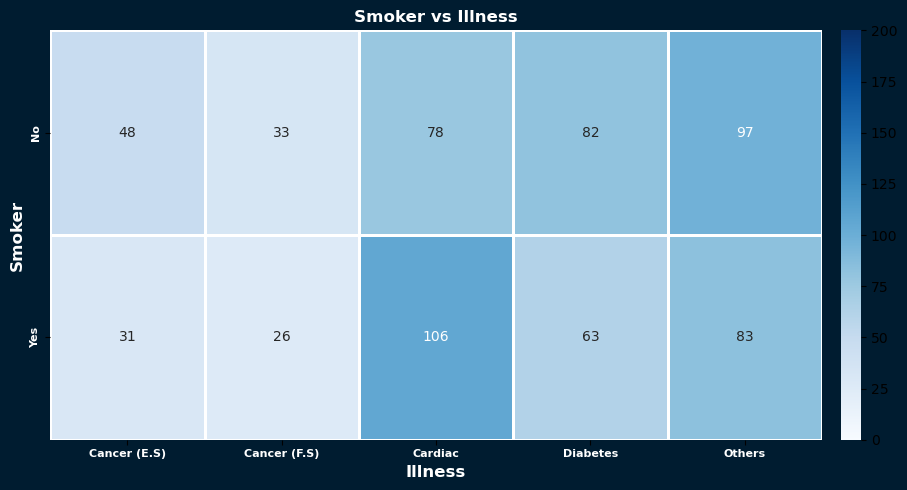

In [10]:
plot_heatmap(pulse, var1='Smoker', var2='Illness')

This heatmap highlights the impact of smoking on various health conditions. Cardiac issues are more common among smokers aligning with the well-known risks of smoking on heart health. While other illnesses like Cancer (E.S.) and diabetes appear more frequently in non-smokers, suggesting that other factors may play a significant role in these conditions.

# Histograms

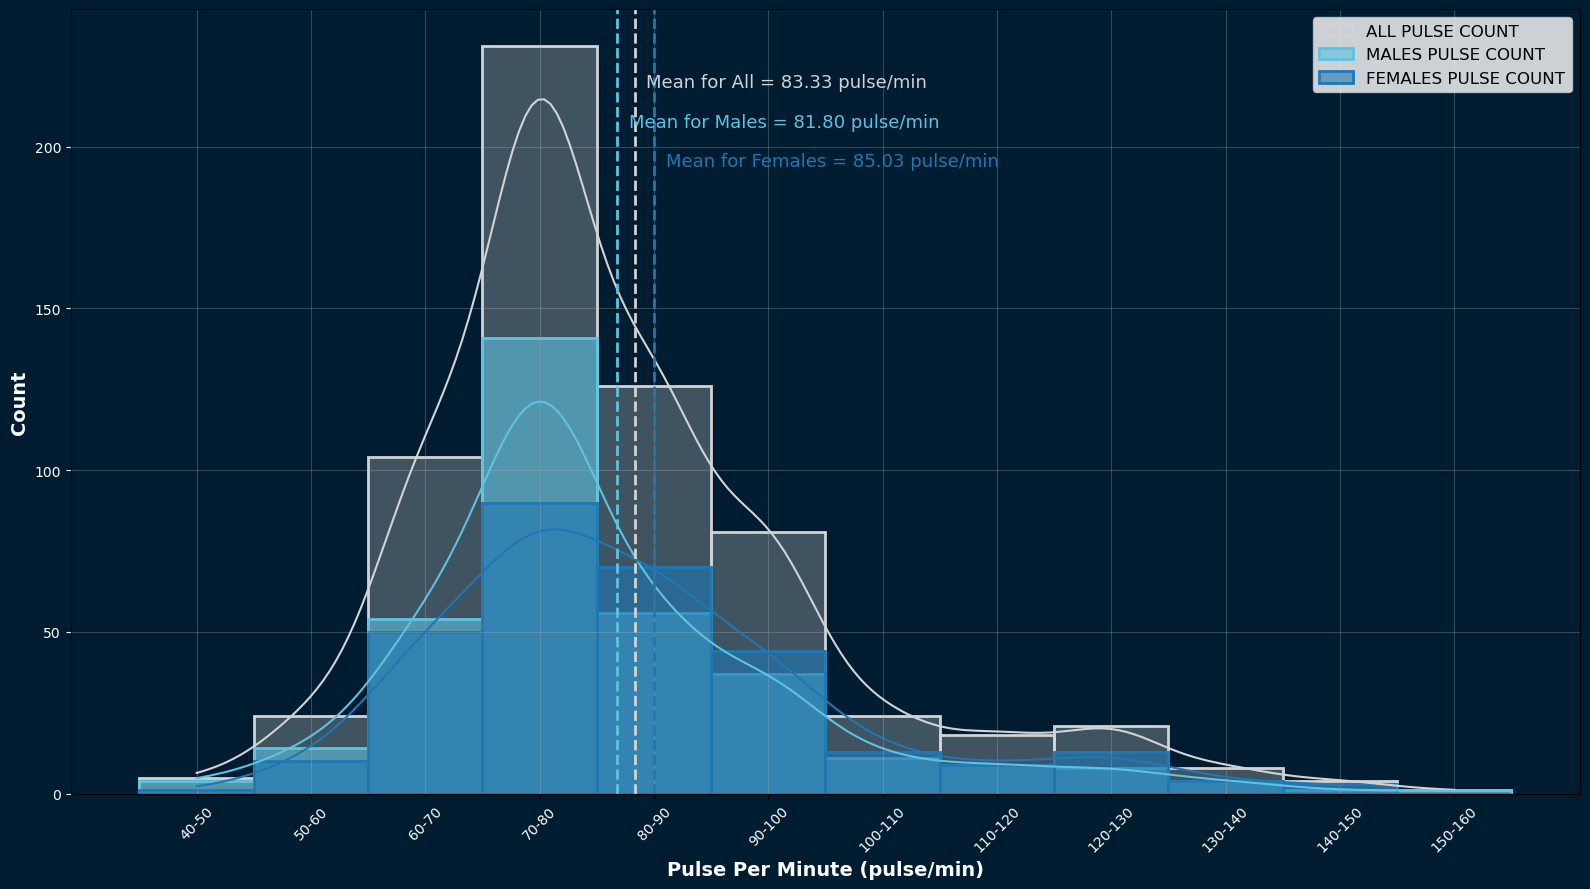

In [11]:
def histogram_with_boxplot(df,  group):
    column_name='Pulse'
    
    fig, ax1 = plt.subplots(figsize=(16, 9))
    bins = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

    # Creating subsets
    df['Pulse Rate midpoints'] = pd.cut(df[column_name], bins=bins, labels=midpoints)

    sns.histplot(df['Pulse Rate midpoints'].dropna().astype(float),
                 stat='count', bins=bins, kde=True,
                 color='lightgray', ax=ax1,
                 edgecolor='lightgray', linewidth=2, alpha=0.3, label='ALL PULSE COUNT')
    
    sns.histplot(df[df[group] == 'Male']['Pulse Rate midpoints'].dropna().astype(float),
                 stat='count', bins=bins, kde=True,
                 color=primary_color, ax=ax1,
                 edgecolor=primary_color, linewidth=2, alpha=0.6, label='MALES PULSE COUNT')
    
    sns.histplot(df[df[group] == 'Female']['Pulse Rate midpoints'].dropna().astype(float),
                 stat='count', bins=bins, kde=True,
                 color=secondary_color, ax=ax1,
                 edgecolor=secondary_color, linewidth=2, alpha=0.6, label='FEMALES PULSE COUNT')

    # Setting labels and title
    ax1.set_xlabel("Pulse Per Minute (pulse/min)", fontsize=14, fontweight="bold", color='white')
    ax1.set_ylabel("Count", fontsize=14, fontweight="bold", color='white')
    ax1.set_xticks(midpoints)
    ax1.set_xticklabels(labels, rotation=45, color='white')
    ax1.tick_params(axis='y', colors='white')  # Set y-axis label color to white
    ax1.grid(True, alpha=0.3)

    # Calculate means
    mean_all = df[column_name].mean()
    mean_male = df[df[group] == 'Male'][column_name].mean()
    mean_female = df[df[group] == 'Female'][column_name].mean()

    # Add vertical lines for means
    ax1.axvline(x=mean_all, c='lightgray', linestyle='--', linewidth=2)
    ax1.text(mean_all + 1, ax1.get_ylim()[1] * 0.9,
             f'Mean for All = {mean_all:.2f} pulse/min', color='lightgray', fontsize=13, ha='left')
    
    ax1.axvline(x=mean_male, c=primary_color, linestyle='--', linewidth=2)
    ax1.text(mean_male + 1, ax1.get_ylim()[1] * 0.85,
             f'Mean for Males = {mean_male:.2f} pulse/min', color=primary_color, fontsize=13, ha='left')
    
    ax1.axvline(x=mean_female, c=secondary_color, linestyle='--', linewidth=2)
    ax1.text(mean_female + 1, ax1.get_ylim()[1] * 0.8,
             f'Mean for Females = {mean_female:.2f} pulse/min', color=secondary_color, fontsize=13, ha='left')

    # Add legend
    ax1.legend(loc='upper right', fontsize=12)

    # Set background color
    fig.patch.set_facecolor(background_color)
    ax1.set_facecolor(background_color)

    # Final plot adjustments
    plt.tight_layout()
    plt.show()


histogram_with_boxplot(pulse,  'Gender')


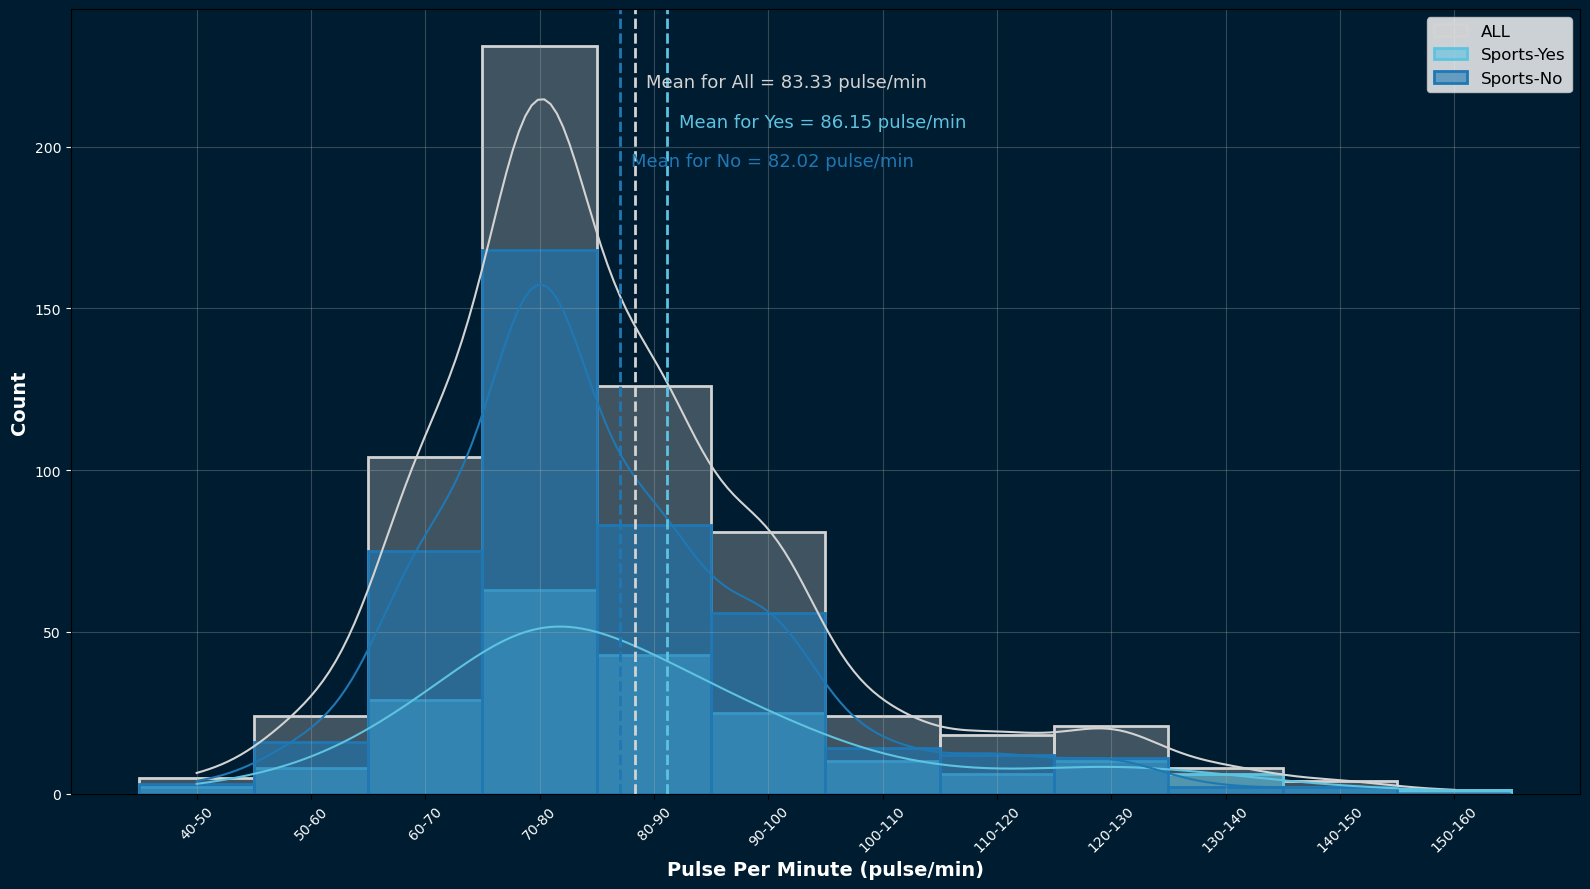

In [12]:
def histogram_with_boxplot(df,  group):
    column_name='Pulse'
    
    fig, ax1 = plt.subplots(figsize=(16, 9))
    bins = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

    # Creating subsets
    df['Pulse Rate midpoints'] = pd.cut(df[column_name], bins=bins, labels=midpoints)

    sns.histplot(df['Pulse Rate midpoints'].dropna().astype(float),
                 stat='count', bins=bins, kde=True,
                 color='lightgray', ax=ax1,
                 edgecolor='lightgray', linewidth=2, alpha=0.3, label='ALL')
    
    sns.histplot(df[df[group] == 'Yes']['Pulse Rate midpoints'].dropna().astype(float),
                 stat='count', bins=bins, kde=True,
                 color=primary_color, ax=ax1,
                 edgecolor=primary_color, linewidth=2, alpha=0.6, label='Sports-Yes')
    
    sns.histplot(df[df[group] == 'No']['Pulse Rate midpoints'].dropna().astype(float),
                 stat='count', bins=bins, kde=True,
                 color=secondary_color, ax=ax1,
                 edgecolor=secondary_color, linewidth=2, alpha=0.6, label='Sports-No')

    # Setting labels and title
    ax1.set_xlabel("Pulse Per Minute (pulse/min)", fontsize=14, fontweight="bold", color='white')
    ax1.set_ylabel("Count", fontsize=14, fontweight="bold", color='white')
    ax1.set_xticks(midpoints)
    ax1.set_xticklabels(labels, rotation=45, color='white')
    ax1.tick_params(axis='y', colors='white')  # Set y-axis label color to white
    ax1.grid(True, alpha=0.3)

    # Calculate means
    mean_all = df[column_name].mean()
    mean_male = df[df[group] == 'Yes'][column_name].mean()
    mean_female = df[df[group] == 'No'][column_name].mean()

    # Add vertical lines for means
    ax1.axvline(x=mean_all, c='lightgray', linestyle='--', linewidth=2)
    ax1.text(mean_all + 1, ax1.get_ylim()[1] * 0.9,
             f'Mean for All = {mean_all:.2f} pulse/min', color='lightgray', fontsize=13, ha='left')
    
    ax1.axvline(x=mean_male, c=primary_color, linestyle='--', linewidth=2)
    ax1.text(mean_male + 1, ax1.get_ylim()[1] * 0.85,
             f'Mean for Yes = {mean_male:.2f} pulse/min', color=primary_color, fontsize=13, ha='left')
    
    ax1.axvline(x=mean_female, c=secondary_color, linestyle='--', linewidth=2)
    ax1.text(mean_female + 1, ax1.get_ylim()[1] * 0.8,
             f'Mean for No = {mean_female:.2f} pulse/min', color=secondary_color, fontsize=13, ha='left')

    # Add legend
    ax1.legend(loc='upper right', fontsize=12)

    # Set background color
    fig.patch.set_facecolor(background_color)
    ax1.set_facecolor(background_color)

    # Final plot adjustments
    plt.tight_layout()
    plt.show()


histogram_with_boxplot(pulse,  'Sports')

# Pie Charts

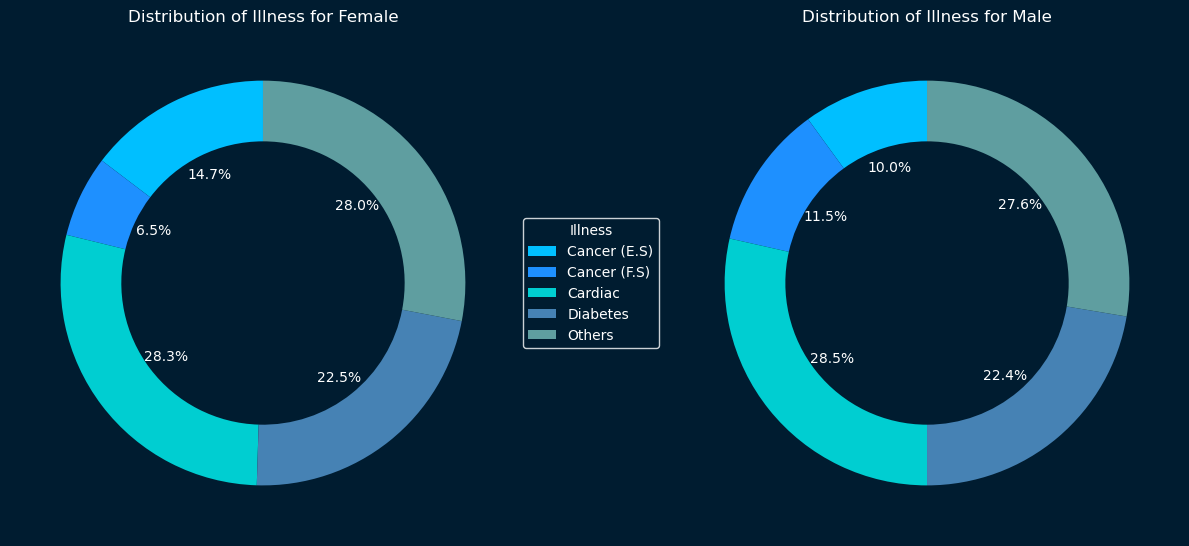

In [13]:
def plot_pie_charts(data, category_column, value_column):
    # Group and unstack the data
    distribution = data.groupby([category_column, value_column]).size().unstack().fillna(0)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), facecolor=background_color)

    for i, category in enumerate(distribution.index):
        sizes = distribution.loc[category]
        labels = sizes.index
        
        # Set dark background for each subplot
        ax[i].set_facecolor(background_color)
        
        # Plot pie chart with percentages and counts
        wedges, texts, autotexts = ax[i].pie(sizes, wedgeprops=dict(width=0.3), startangle=90, colors=brand_colors, autopct='%1.1f%%')
        
        # Customize text color
        for text in texts + autotexts:
            text.set_color("white")
        
        ax[i].set_title(f'Distribution of {value_column} for {category}', color='white')
        
    # Add a legend with only category names
    legend = ax[0].legend(wedges, labels, title=value_column, loc="center left", bbox_to_anchor=(1, 0.5), facecolor=background_color, edgecolor='white', fontsize=10)

    # Set legend text color to white
    plt.setp(legend.get_texts(), color='white')
    plt.setp(legend.get_title(), color='white')

    plt.tight_layout()
    plt.show()

plot_pie_charts(pulse, 'Gender','Illness')


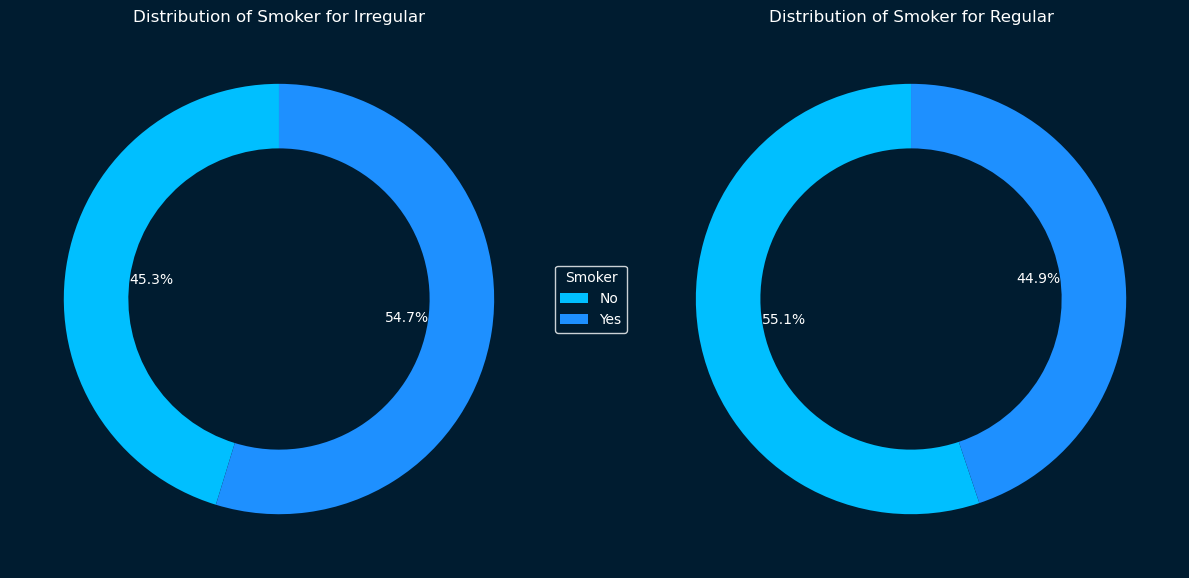

In [14]:

plot_pie_charts(pulse, 'Beat Regularity','Smoker')


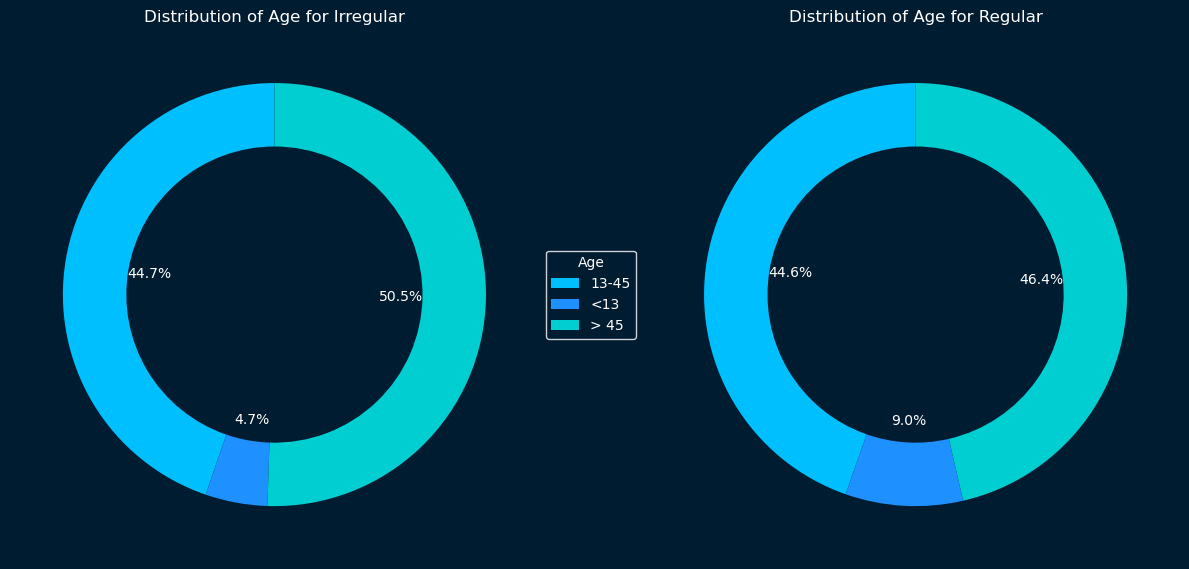

In [15]:

plot_pie_charts(pulse, 'Beat Regularity','Age')